As customers have more options for similar content to consume or similar products and
services to shop for, it has become more difficult for many businesses to retain their
customers and not lose them to other competitors. As the cost of acquiring new customers
is typically higher than that of retaining and keeping existing customers, customer churn is
becoming more and more of a concern than ever before. In order to retain existing
customers and not lose them to competitors, businesses should not only try to understand
their customers and their customers' needs and interests, but they should also be able to
identify which customers are highly likely to churn and how to retain these customers at
churn risk.

Customer churn is when a customer decides to stop using services, content, or products
from a company. As we have briefly discussed in Chapter 7, Exploratory Analysis for
Customer Behavior, when we discussed customer analytics, it is much less expensive to
retain existing customers than to acquire new customers, and the revenue from repeat
customers is typically higher than that form new customers. In competitive industries,
where a business faces many competitors, the cost of new customer acquisition is even
higher, and retaining existing customers becomes more important for such businesses.

There are many reasons behind customers leaving a business. Some of the common reasons
why customers churn are poor customer service, not finding enough value in the products
or services, lack of communications, and lack of customer loyalty. The first step to retaining
these customers is to monitor customer churn rates over time. If the churn rate is generally
high or is increasing over time, then it will be a good idea to dedicate some resources to
improving customer retention.

In order to improve the customer retention rate, the top priority should be to understand
the customer better. You can survey customers who have already churned to understand
why they left. You can also survey existing customers to understand what their needs are
and what their pain points are. A data science and data analytics approach would be to
look into the data. For example, you can look at customers' web activity data and
understand where they spend the most time, whether there were errors on the pages that
they were looking at, or whether their search results did not return good content. You can
also look into the customer service call logs to understand how long their wait time was,
what their complaints were, and how their issues were handled. Conducting deep analyses
on these data points can reveal the problems that a business is facing in retaining its
existing customers.

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv('/Users/muratbakir/Desktop/Hands_on_Data_Science/Chapter_11/Customer_Retention/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [91]:
df.shape

(7043, 21)

# Data Analysis & Preparation

In [92]:
df['Churn'] = df['Churn'].apply(
  lambda x: 1 if x=='Yes' else 0
)

In [93]:
df['Churn'].mean()

0.2653698707936959

In [94]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float')

In [96]:
df.shape

(7043, 21)

In [97]:
df.dropna().shape

(7032, 21)

In [98]:
df = df.dropna()

- Continuous Vars

In [99]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


As you can see from the summary statistics, the three tenure, MonthlyCharges,
and TotalCharges continuous variables all have different scales. The
tenure variable, ranges from 1 to 72, while the TotalCharges variable , ranges
from 18.8 to 8684.8. ANN models typically perform better with scaled or
normalized features.

In [100]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

In [101]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,-9.851808e-16,-2.627149e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


As you see from this output, all the variables now have a mean of 0 and a
standard deviation of 1. We are going to use these normalized variables for future
model building.

In [110]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

- One-Hot Encoding

In [109]:
for col in list(df.columns):
  print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


As this output suggests, there are 7032 unique customer IDs, 2 unique genders, 3 unique
values for MultipleLines, and 6530 unique values for TotalCharges. We have handled
the tenure, MonthlyCharges, and TotalCharges variables, in the previous step, so we
are going to focus on those variables with 2 to 4 unique values.

In [114]:
categorical_vars = [x for x in df.columns if x not in ['customerID'] and x not in continuous_vars]
categorical_vars

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

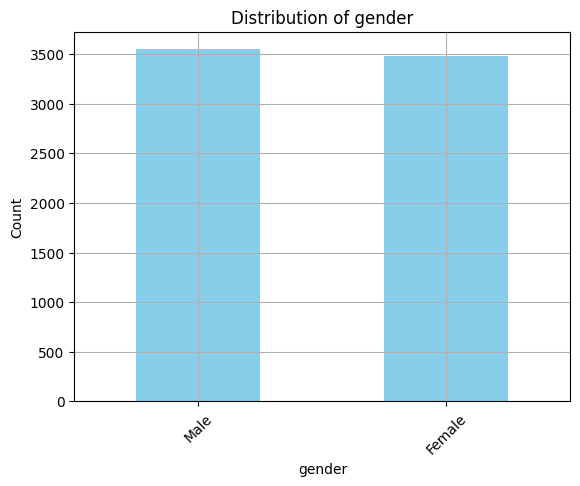

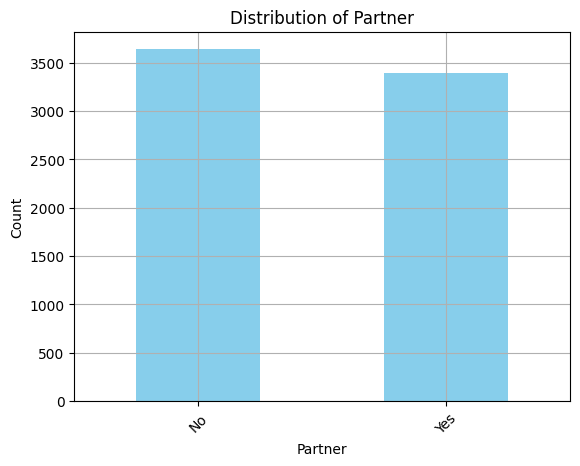

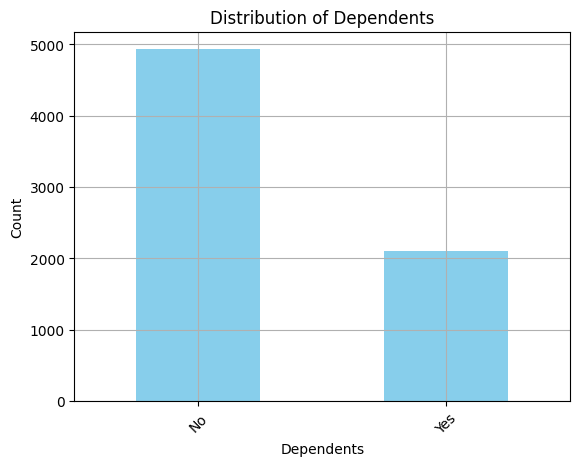

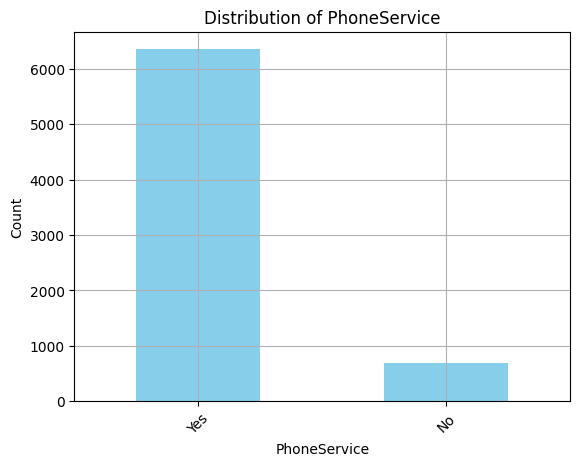

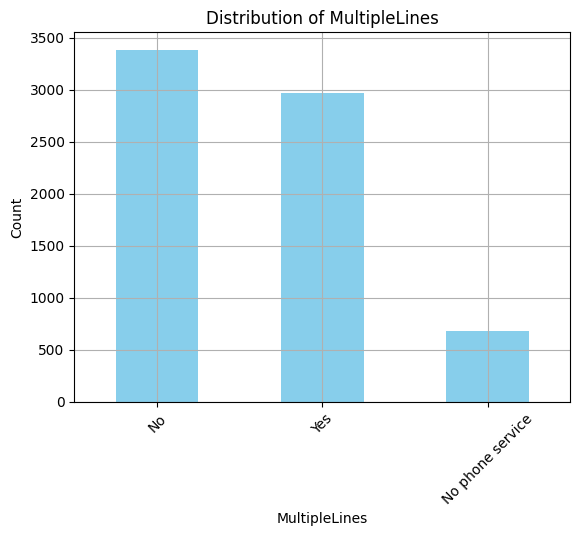

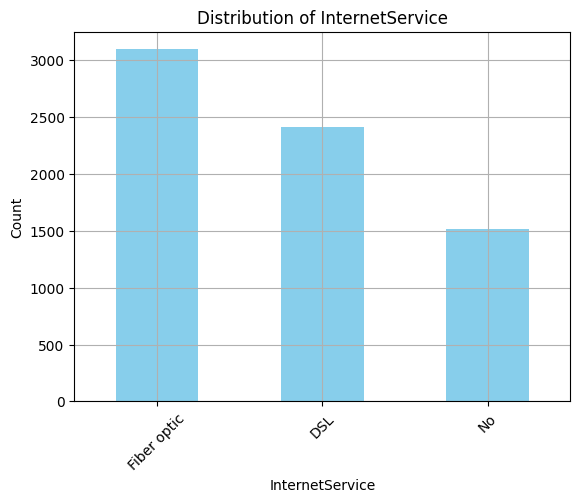

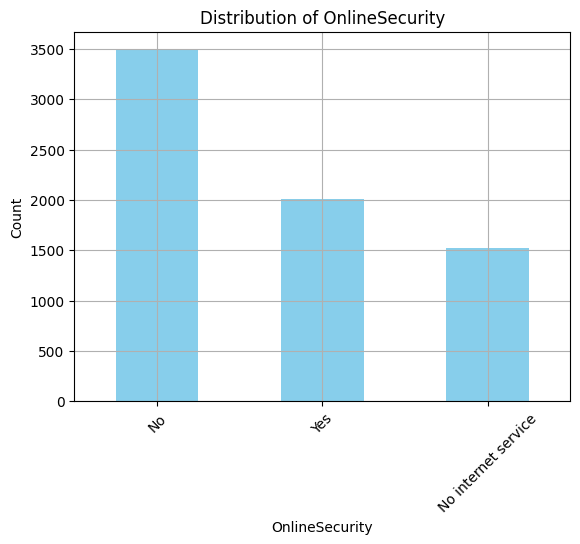

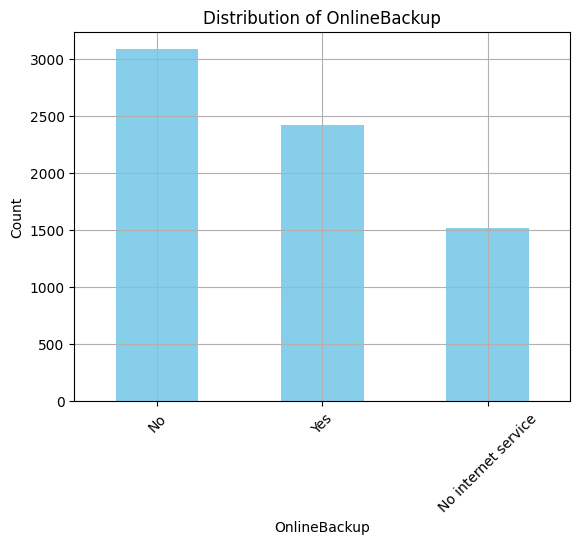

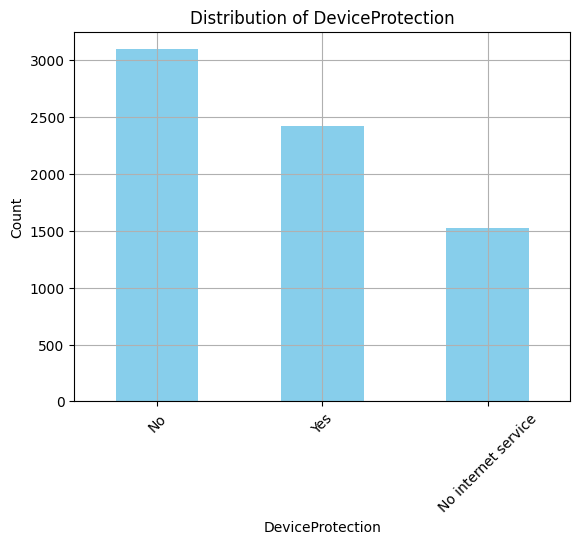

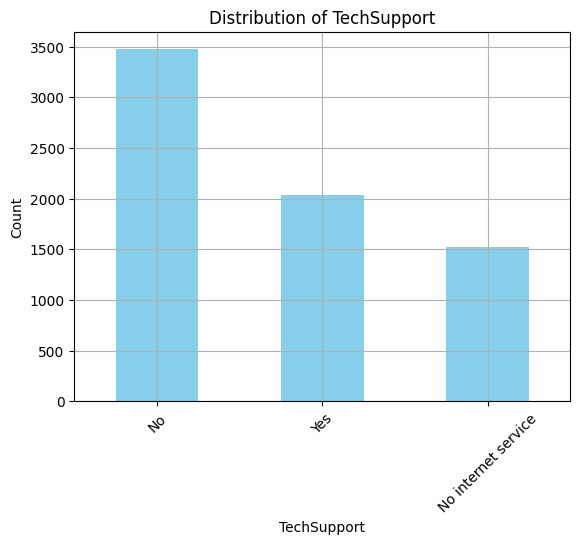

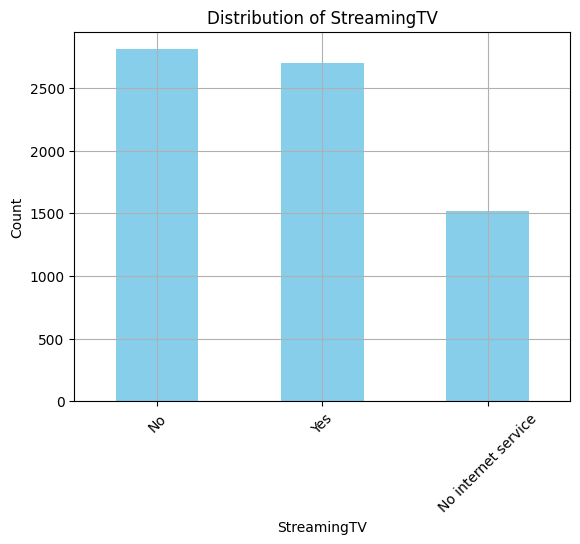

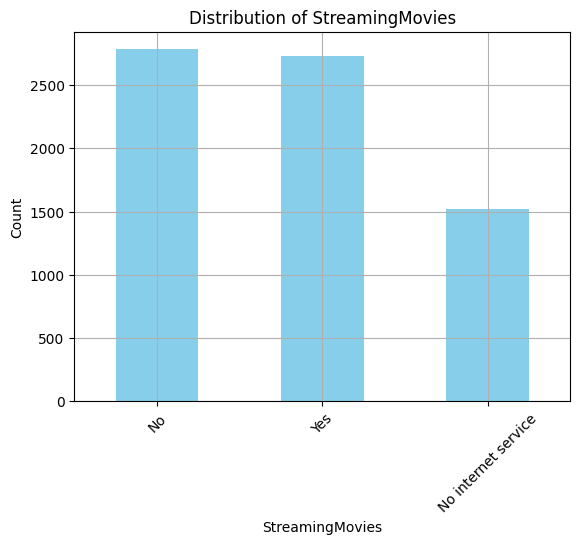

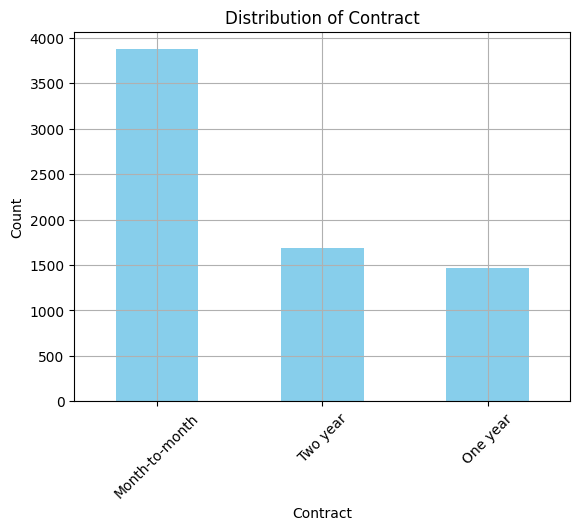

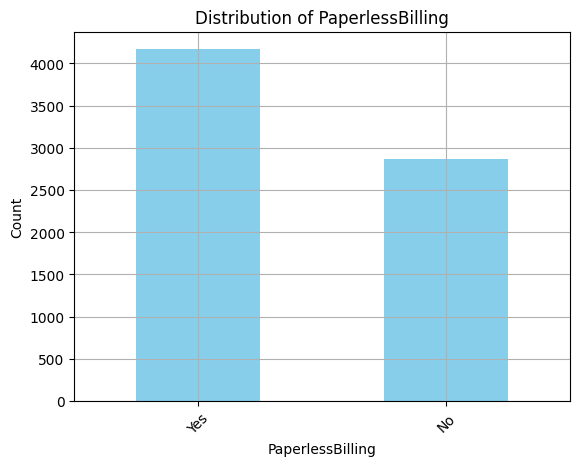

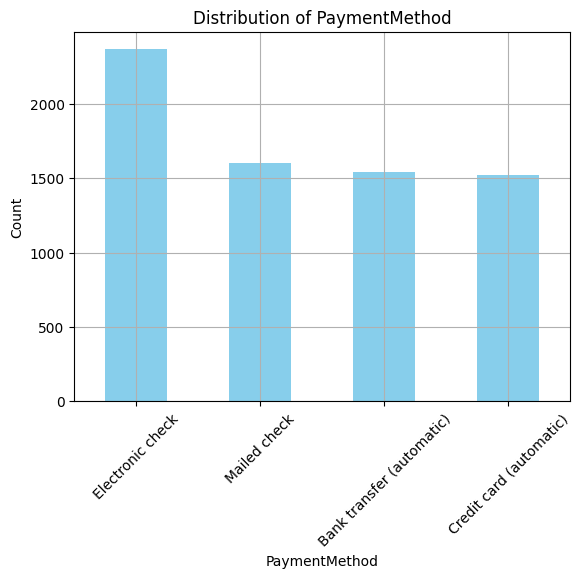

In [ ]:
for col in categorical_vars:
    df[col].value_counts().plot(kind='bar', grid=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [139]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [143]:
sample_set.shape

(7032, 47)

In [140]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [141]:
sample_set.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'genderFemale',
       'genderMale', 'SeniorCitizen0', 'SeniorCitizen1', 'PartnerNo',
       'PartnerYes', 'DependentsNo', 'DependentsYes', 'PhoneServiceNo',
       'PhoneServiceYes', 'MultipleLinesNo', 'MultipleLinesNo phone service',
       'MultipleLinesYes', 'InternetServiceDSL', 'InternetServiceFiber optic',
       'InternetServiceNo', 'OnlineSecurityNo',
       'OnlineSecurityNo internet service', 'OnlineSecurityYes',
       'OnlineBackupNo', 'OnlineBackupNo internet service', 'OnlineBackupYes',
       'DeviceProtectionNo', 'DeviceProtectionNo internet service',
       'DeviceProtectionYes', 'TechSupportNo',
       'TechSupportNo internet service', 'TechSupportYes', 'StreamingTVNo',
       'StreamingTVNo internet service', 'StreamingTVYes', 'StreamingMoviesNo',
       'StreamingMoviesNo internet service', 'StreamingMoviesYes',
       'ContractMonth-to-month', 'ContractOne year', 'ContractTwo year',
       'PaperlessBilli

# Train & Test Sets

In [146]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

In [150]:
from keras.models import Sequential
from keras.layers import Dense

In [151]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

In [155]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.5402 - loss: 0.6869 
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.7577 - loss: 0.4764
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7906 - loss: 0.4409
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4268 
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8064 - loss: 0.4065
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8041 - loss: 0.4048
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8000 - loss: 0.4288
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8136 - loss: 0.4006
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8015 - loss: 0.4187
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8165 - loss: 0.3957
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8170 - loss: 0.4016
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step

- ROC & AUC

In [156]:
from sklearn.metrics import roc_curve, auc

In [157]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


In [158]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [159]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8704
Out-Sample AUC: 0.8354


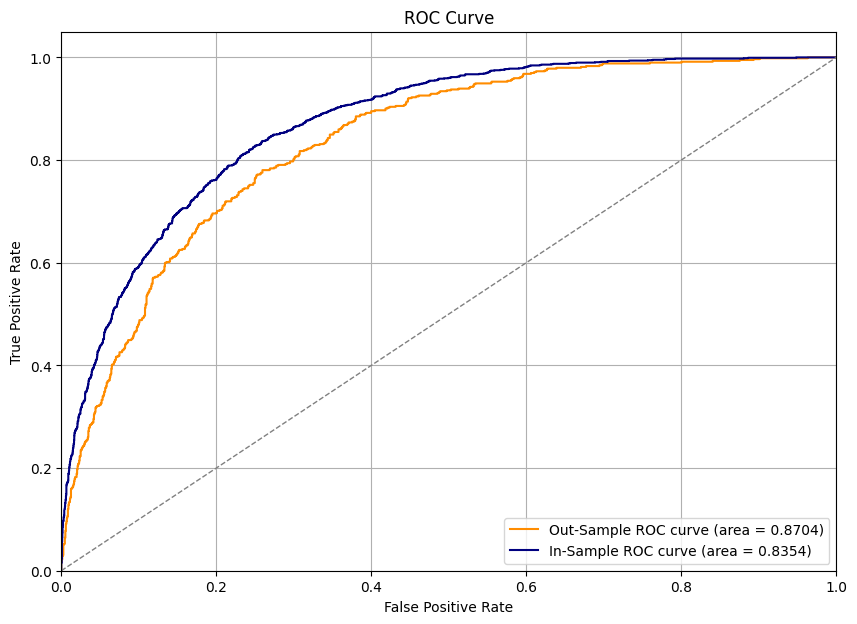

In [160]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

Along with the accuracy, precision, and recall measures that we looked at previously, the
AUC and the ROC curve also suggest that the model captures and predicts those customers
at churn risk pretty well. As you can see from these evaluation outputs, it is better to use
the output of this model for identifying the customers who are likely to churn than simply
guessing who they will be. By focusing on those customers with high churn probabilities
from this model in your marketing strategies, you can try to retain those customers at churn
risks in a more cost-effective way.